<a href="https://colab.research.google.com/github/Nosa10/OIBSIP/blob/main/Customer_Segmentation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

customer_df = pd.read_csv('/content/ifood_df.csv')
customer_df.head()
#

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


Data¶

The data contains 2,205 observations and 39 columns. The dataset description on the card does not match the actual columns in the dataset. The below list contains actual columns from the dataset

Feature	Description

AcceptedCmp1	1 if customer accepted the offer in the 1st campaign, 0 otherwise

AcceptedCmp2	1 if customer accepted the offer in the 2nd campaign, 0 otherwise

AcceptedCmp3	1 if customer accepted the offer in the 3rd campaign, 0 otherwise

AcceptedCmp4	1 if customer accepted the offer in the 4th campaign, 0 otherwise

AcceptedCmp5	1 if customer accepted the offer in the 5th campaign, 0 otherwise

AcceptedCmpOverall	overall number of accepted campaigns

Response	1 if customer accepted the offer in the last campaign, 0 otherwise

Complain	1 if customer complained in the last 2 years

Customer_Days	number of days since registration as a customer

education_2n Cycle	customer has secondary education

education_Basic	customer has basic education

education_Graduation	Customer has a bachelor degree

education_Master	Customer has a masters degree

education_PhD	Customer has a PhD

marital_Divorced	1 if customer is divorced, 0 otherwise.

marital_Married	1 if customer is married, 0 otherwise.

marital_Single	1 if customer is single, 0 otherwise.

marital_Together	1 if customer is in relationship, 0 otherwise.

marital_Widow	1 if customer is a widow / widower, 0 otherwise

Kidhome	number of small children in customer’s household

Teenhome	number of teenagers in customer’s household

Income	customer’s yearly household income

MntFishProducts	amount spent on fish products in the last 2 years

MntMeatProducts	amount spent on meat products in the last 2 years

MntFruits	amount spent on fruits products in the last 2 years

MntSweetProducts	amount spent on sweet products in the last 2 years

MntWines	amount spent on wine products in the last 2 years

MntGoldProds	amount spent on gold products in the last 2 years

NumDealsPurchases	number of purchases made with discount

NumCatalogPurchases	number of purchases made using catalogue

NumStorePurchases	number of purchases made directly in stores

NumWebPurchases	number of purchases made through company’s web site

NumWebVisitsMonth	number of visits to company’s web site in the last month

Recency	number of days since the last purchase

Z_CostContact

Z_Revenue

Age	Age of customer

MntTotal	Total amount spent on all the products

MntRegularProds



In [ ]:
customer_df.isna().sum()
customer_df.shape

(2205, 39)

In [ ]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [ ]:
customer_df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


In [ ]:
customer_df = customer_df.drop_duplicates()
customer_df.shape

(2021, 39)

In [ ]:
customer_df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,...,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000
mean,51687.258783,0.443345,0.509649,48.880752,306.492331,26.364671,166.059871,37.603662,27.268679,43.921821,...,0.251856,0.034636,0.090549,0.024245,0.502227,0.165760,0.217219,563.789213,519.867392,0.302326
std,20713.046401,0.536196,0.546393,28.950917,337.603877,39.776518,219.869126,54.892196,41.575454,51.678211,...,0.434186,0.182902,0.287038,0.153848,0.500119,0.371957,0.412455,576.775749,554.797857,0.680812
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.000000
25%,35416.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,42.000000,0.000000
50%,51412.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.000000
75%,68274.000000,1.000000,1.000000,74.000000,507.000000,33.000000,230.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,883.000000,0.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.000000


Average Income is 51687.26 $

In [ ]:
customer_df.nunique()

,0
Income,1963
Kidhome,3
Teenhome,3
Recency,100
MntWines,775
MntFruits,158
MntMeatProducts,551
MntFishProducts,182
MntSweetProducts,176
MntGoldProds,212


We would not need columns that have the same values

In [ ]:
customer_df.drop(columns=['Z_CostContact','Z_Revenue'],inplace=True)

Let's check for outliers

Text(0.5, 1.0, 'Box plot for Income')

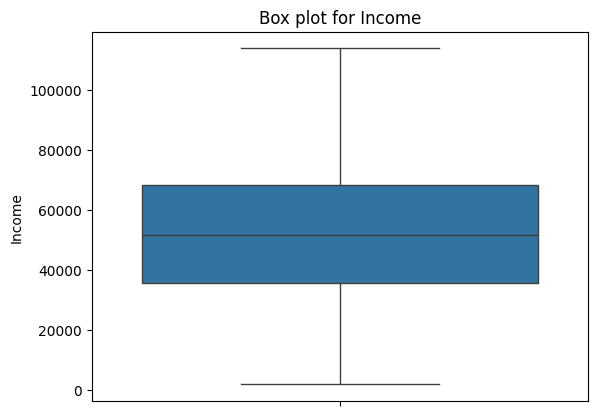

In [ ]:
sns.boxplot(customer_df['Income'])
plt.title('Box plot for Income')

No outliers for income

Text(0.5, 1.0, 'Box plot for Age')

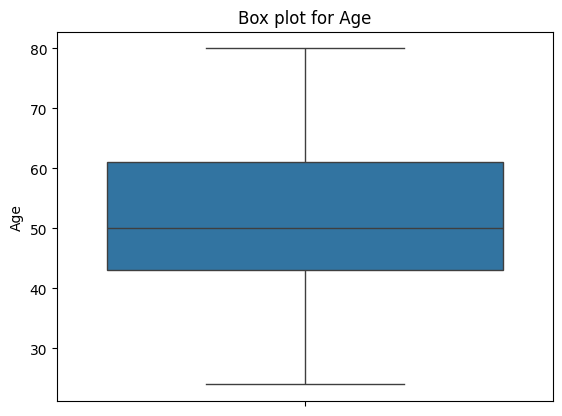

In [ ]:
sns.boxplot(customer_df['Age'])
plt.title('Box plot for Age')

No outliers for age

Text(0.5, 1.0, 'Box plot for MntTotal')

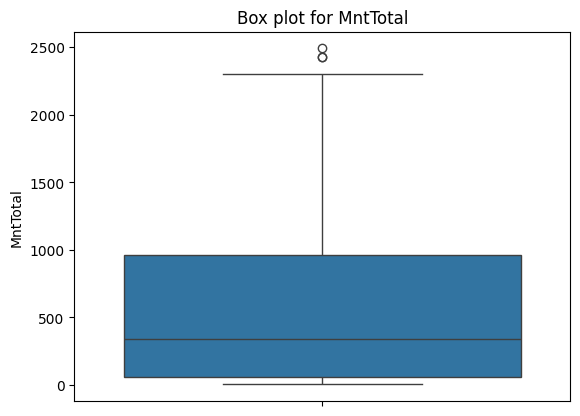

In [ ]:
sns.boxplot(customer_df['MntTotal'])
plt.title('Box plot for MntTotal')

There are some couple of outliers for total amount spent on all products

In [ ]:
# Let's investigate the outliers
Q1 = customer_df['MntTotal'].quantile(0.25)
Q3 = customer_df['MntTotal'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = customer_df[(customer_df['MntTotal'] < lower_bound) | (customer_df['MntTotal'] > upper_bound)]
outliers

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
1159,90638.0,0,0,29,1156,120,915,94,144,96,...,0,0,0,0,0,1,0,2429,2333,1
1467,87679.0,0,0,62,1259,172,815,97,148,33,...,1,0,0,0,1,0,0,2491,2458,3
1547,90638.0,0,0,29,1156,120,915,94,144,96,...,0,0,0,0,0,1,0,2429,2333,1


In [ ]:
customer_df['MntTotal'] = customer_df['MntTotal'].clip(lower=lower_bound, upper=upper_bound)
customer_df['MntTotal'].describe()

,MntTotal
count,2021.000000
mean,563.607867
std,576.200310
min,4.000000
25%,55.000000
50%,343.000000
75%,964.000000
max,2327.500000


Next let's check the correlation between values and MntTotal. We would use pearson for continous values and not the binary values

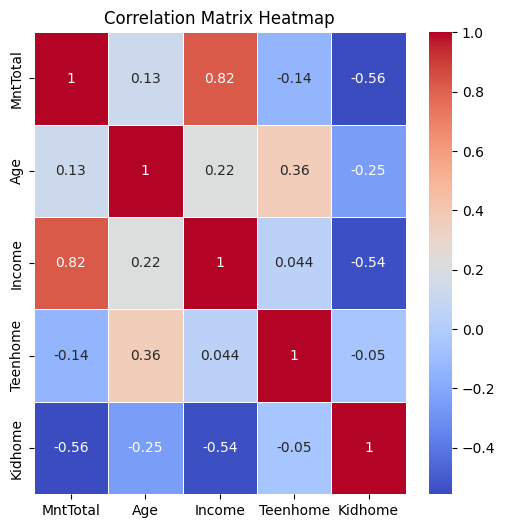

In [ ]:
corr_matrix = customer_df[['MntTotal','Age','Income','Teenhome','Kidhome']].corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

From the matrix, Income has a very strong linear relationship with MntTotal while Kidhome, has a moderate to weak negative relationship with MntTotal

For the relationship between a continuous variable MntTotal and binary variables like marital status we would use **Point-Biserial Correlation Point-Biserial** **Correlation**. It is used to measure the strength and direction of the linear relationship between a binary variable and a continuous variable. To make the correlation easier we are going to group the columns into common column names.

In [ ]:
cols_marital = ['marital_Divorced', 'marital_Married','marital_Single', 'marital_Together', 'marital_Widow']
cols_mnt = ['MntTotal', 'MntRegularProds','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
cols_communication = ['Complain', 'Response', 'Customer_Days']
cols_campaigns = ['AcceptedCmpOverall', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
cols_source_of_purchase = ['NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases']
cols_education = ['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD']

In [ ]:
for col in cols_marital:
    correlation, p_value = pointbiserialr(customer_df[col], customer_df['MntTotal'])
    print(f'{correlation:.4f}: Point-Biserial Correlation for {col} with p-value {p_value:.4f}')

0.0010: Point-Biserial Correlation for marital_Divorced with p-value 0.9653
-0.0194: Point-Biserial Correlation for marital_Married with p-value 0.3843
0.0035: Point-Biserial Correlation for marital_Single with p-value 0.8741
-0.0003: Point-Biserial Correlation for marital_Together with p-value 0.9892
0.0427: Point-Biserial Correlation for marital_Widow with p-value 0.0548


There is no strong Point-Biserial correlation between MntTotal and various education levels

In [ ]:
for col in cols_education:
    correlation, p_value = pointbiserialr(customer_df[col], customer_df['MntTotal'])
    print(f'{correlation:.4f}: Point-Biserial Correlation for {col} with p-value {p_value:.4f}')

-0.0603: Point-Biserial Correlation for education_2n Cycle with p-value 0.0067
-0.1375: Point-Biserial Correlation for education_Basic with p-value 0.0000
0.0170: Point-Biserial Correlation for education_Graduation with p-value 0.4444
0.0116: Point-Biserial Correlation for education_Master with p-value 0.6016
0.0621: Point-Biserial Correlation for education_PhD with p-value 0.0052


There is no strong Point-Biserial correlation between MntTotal and various education levels.

In [ ]:
for col in cols_communication:
    correlation, p_value = pointbiserialr(customer_df[col], customer_df['MntTotal'])
    print(f'{correlation:.4f}: Point-Biserial Correlation for {col} with p-value {p_value:.4f}')

-0.0309: Point-Biserial Correlation for Complain with p-value 0.1652
0.2612: Point-Biserial Correlation for Response with p-value 0.0000
0.1580: Point-Biserial Correlation for Customer_Days with p-value 0.0000


Weak Point-Biserial correlation between MntTotal and if customer accepted the offer in the campaign or not.

In [ ]:
for col in cols_campaigns:
    correlation, p_value = pointbiserialr(customer_df[col], customer_df['MntTotal'])
    print(f'{correlation:.4f}: Point-Biserial Correlation for {col} with p-value {p_value:.4f}')

0.4571: Point-Biserial Correlation for AcceptedCmpOverall with p-value 0.0000
0.3913: Point-Biserial Correlation for AcceptedCmp1 with p-value 0.0000
0.1366: Point-Biserial Correlation for AcceptedCmp2 with p-value 0.0000
0.0433: Point-Biserial Correlation for AcceptedCmp3 with p-value 0.0518
0.2466: Point-Biserial Correlation for AcceptedCmp4 with p-value 0.0000
0.4701: Point-Biserial Correlation for AcceptedCmp5 with p-value 0.0000


Weak to moderate Point-Biserial correlation between MntTotal and if customer accepted the campaign offer or not.

In [ ]:
for col in cols_source_of_purchase:
    correlation, p_value = pointbiserialr(customer_df[col], customer_df['MntTotal'])
    print(f'{correlation:.4f}: Point-Biserial Correlation for {col} with p-value {p_value:.4f}')

0.5164: Point-Biserial Correlation for NumWebPurchases with p-value 0.0000
0.7881: Point-Biserial Correlation for NumCatalogPurchases with p-value 0.0000
0.6746: Point-Biserial Correlation for NumStorePurchases with p-value 0.0000


Strong Relationships between MntTotal and source of purchases

**Feature Engineering**

There are 3 features that reflect if a person is single (Single, Divorced, Widow) and 2 features if a person is in relationship (Together, Married). We will add an additional feature 'In_relationship'. This feature will equal 1 if a customer's marital status is 'Married' or 'Together' and 0 in all other cases.

In [ ]:
def relationship_status(row):
    if row['marital_Married'] ==1:
        return 1
    elif row['marital_Together'] == 1:
        return 1
    else:
        return 0
customer_df['In_relationship'] = customer_df.apply(relationship_status, axis=1)
customer_df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,In_relationship
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,1,0,0,1529.0,1441,0,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,1,0,0,21.0,15,0,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,0,1,0,0,734.0,692,0,1
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,0,1,0,0,48.0,43,0,1
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,1,407.0,392,0,1


In [ ]:
customer_df['Number_of_purchases'] = customer_df[['NumStorePurchases', 'NumCatalogPurchases', 'NumWebPurchases']].sum(axis=1)

In [ ]:
correlation, p_value = pointbiserialr(customer_df['In_relationship'], customer_df['MntTotal'])
print(f'{correlation:.4f}: Point-Biserial Correlation for In_relationship with p-value {p_value:.4f}')

-0.0199: Point-Biserial Correlation for In_relationship with p-value 0.3703


For the features, I would be using the income, total amount spent on products, overall accepted number of campaign offers, number of purchases and if they are in relationships

K MEANS CLUSTERING

In [ ]:
scaler = StandardScaler()
features = ['Income', 'MntTotal','In_relationship','Number_of_purchases','AcceptedCmpOverall']
customer_df_scaled = customer_df.copy()
customer_df_scaled[features] = scaler.fit_transform(customer_df[features])
customer_df_scaled[features].describe()

,Income,MntTotal,In_relationship,Number_of_purchases,AcceptedCmpOverall
count,2.021000e+03,2.021000e+03,2.021000e+03,2.021000e+03,2.021000e+03
mean,-1.494214e-17,-8.262125e-17,-8.965284e-17,-5.405539e-17,6.328436e-17
std,1.000247e+00,1.000247e+00,1.000247e+00,1.000247e+00,1.000247e+00
min,-2.412471e+00,-9.714441e-01,-1.334135e+00,-1.755072e+00,-4.441763e-01
25%,-7.857505e-01,-8.829113e-01,-1.334135e+00,-9.171647e-01,-4.441763e-01
50%,-1.329244e-02,-3.829614e-01,7.495491e-01,-7.925773e-02,-4.441763e-01
75%,8.009853e-01,6.950556e-01,7.495491e-01,7.586492e-01,-4.441763e-01
max,2.996281e+00,3.062006e+00,7.495491e-01,2.713765e+00,5.432618e+00


To choose the optimal number of clusters let's use the elbow and sihoulette score method

First lets implement Principal component Analysis (PCA). PCA reduces the number of features while retaining most of the variability (or information) in the data, making it easier for clustering algorithms like K-Means to identify meaningful patterns.

In [ ]:
from sklearn import decomposition
pca = decomposition.PCA(n_components = 2)
pca_res = pca.fit_transform(customer_df_scaled[features])
customer_df_scaled['pc1'] = pca_res[:,0]
customer_df_scaled['pc2'] = pca_res[:,1]

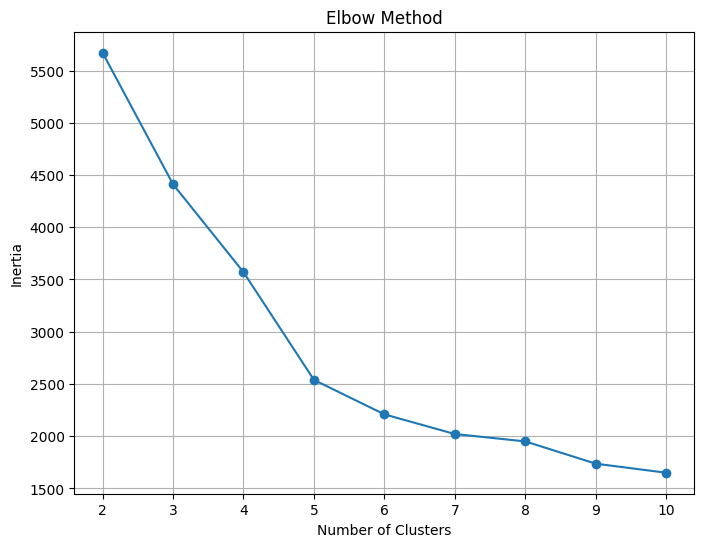

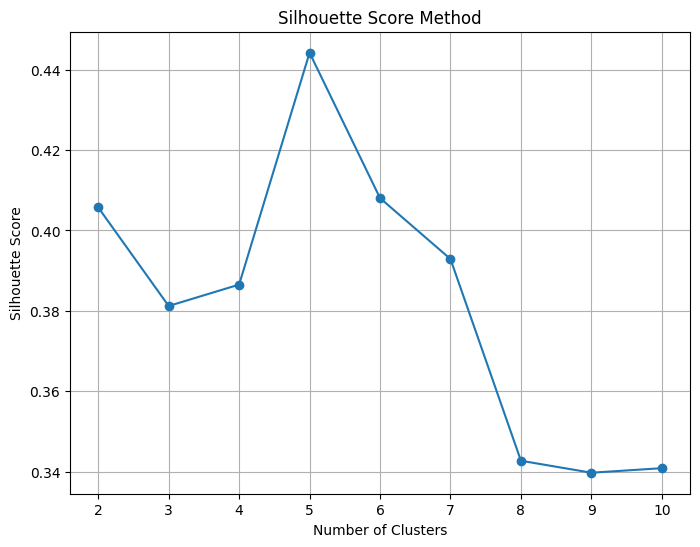

In [ ]:
inertia = []
silhouette_scores = []

for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(customer_df_scaled[features])
    inertia.append(kmeans.inertia_)

    score = silhouette_score(customer_df_scaled[features], clusters)
    silhouette_scores.append(score)

# Plot for Elbow score
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

# Plot for Silhoutte_score
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.grid(True)
plt.show()

The required number of clusters is 5

2021


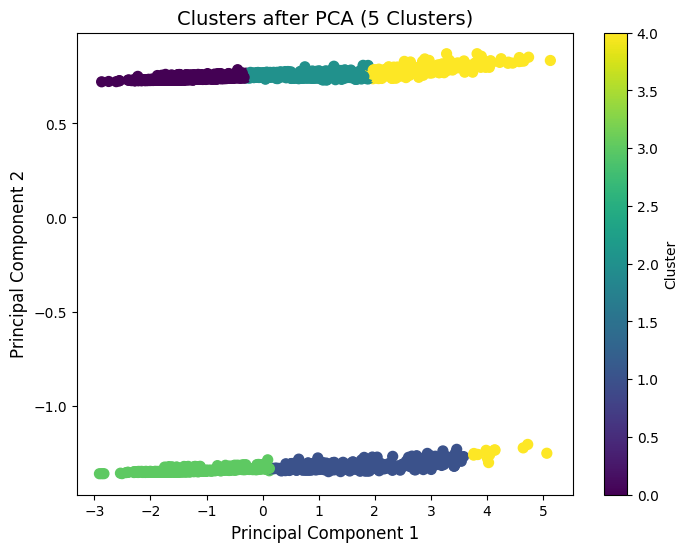

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(pca_res)
print(len(clusters))
# Visualize the clusters in the 2D space after PCA
plt.figure(figsize=(8, 6))
plt.scatter(pca_res[:, 0], pca_res[:, 1], c=clusters, cmap='viridis', s=50)
plt.title('Clusters after PCA (5 Clusters)', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
customer_df['Cluster'] = clusters
customer_df.groupby('Cluster')[features].mean()

,Income,MntTotal,In_relationship,Number_of_purchases,AcceptedCmpOverall
Cluster,,,,,
0,35287.087613,103.876133,1.000000,6.527190,0.077039
1,69911.572785,1096.943038,0.000000,19.037975,0.465190
2,63967.038636,812.118182,1.000000,17.722727,0.188636
3,36607.550251,131.213568,0.000000,7.150754,0.087940
4,79475.800000,1532.178049,0.936585,21.551220,1.439024


<ipython-input-29-8570460e4316>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='MntTotal', data=customer_df, palette='viridis')


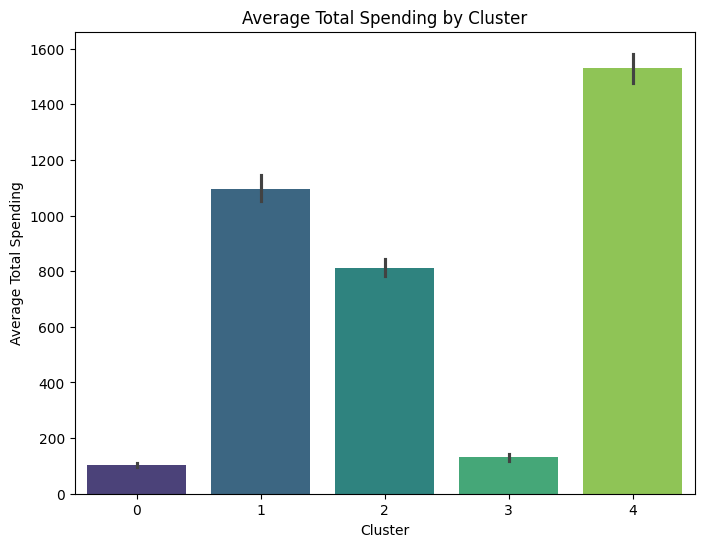

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Cluster', y='MntTotal', data=customer_df, palette='viridis')
plt.title("Average Total Spending by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Average Total Spending")
plt.show()


Cluster Sizes

<ipython-input-30-2a0140e1edc6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster',y='MntTotal', data=cluster_sizes, palette = 'viridis')


,Cluster,MntTotal,%
0,0,662,33.0
1,1,316,16.0
2,2,440,22.0
3,3,398,20.0
4,4,205,10.0


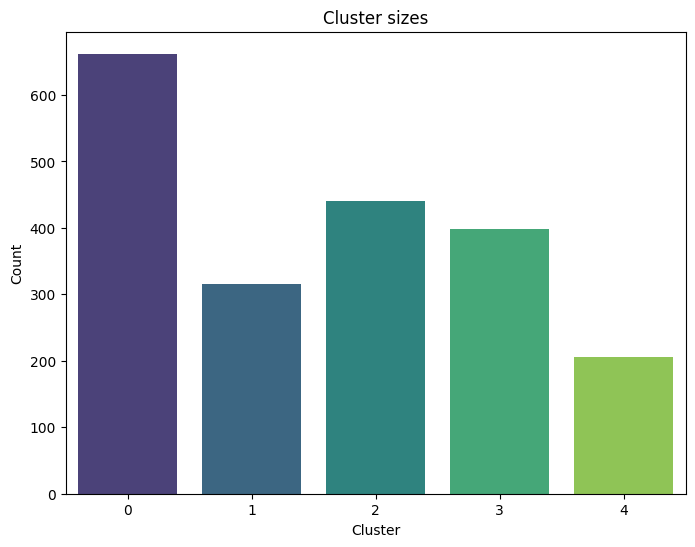

In [ ]:
cluster_sizes = customer_df.groupby('Cluster')['MntTotal'].count().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(x='Cluster',y='MntTotal', data=cluster_sizes, palette = 'viridis')
plt.title('Cluster sizes')
plt.xlabel('Cluster')
plt.ylabel('Count')

total_rows = len(customer_df)
cluster_sizes['%'] = round(cluster_sizes['MntTotal'] / total_rows*100,0)
cluster_sizes.head()

Mean consumption of different product types by cluster

In [ ]:
# Mean consumption of different product types
mnt_data = customer_df.groupby('Cluster')[cols_mnt].mean().reset_index()
mnt_data.head()

,Cluster,MntTotal,MntRegularProds,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,0,103.876133,84.302115,53.929003,6.151057,28.222054,9.507553,6.066465,19.574018
1,1,1096.943038,1024.455696,586.344937,51.294304,335.617089,72.351266,51.977848,73.129747
2,2,812.118182,749.315909,455.984091,39.329545,221.295455,54.884091,40.625000,62.802273
3,3,131.213568,107.912060,70.967337,7.645729,35.449749,9.984925,7.165829,23.301508
4,4,1532.178049,1455.941463,827.107317,61.726829,484.829268,91.302439,68.009756,77.034146


<ipython-input-32-ca180692ed0f>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Cluster", y="Consumption", hue="Product", data=melted_data, ci=None, palette="viridis")


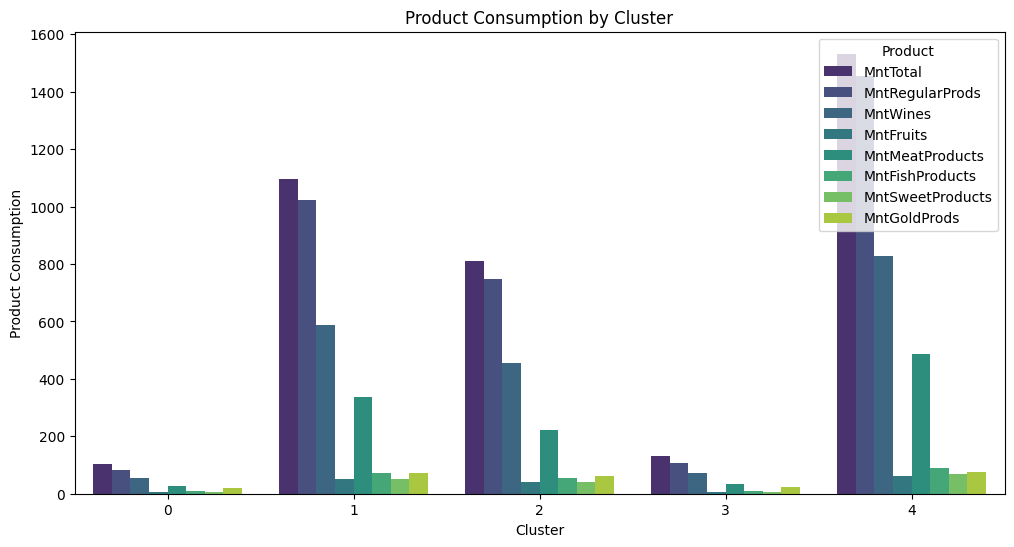

In [ ]:
melted_data = pd.melt(mnt_data, id_vars="Cluster", var_name="Product", value_name="Consumption")
plt.figure(figsize=(12, 6))
sns.barplot(x="Cluster", y="Consumption", hue="Product", data=melted_data, ci=None, palette="viridis")
plt.title("Product Consumption by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Product Consumption")
plt.xticks(rotation=0)
plt.legend(title="Product", loc="upper right")

plt.show()

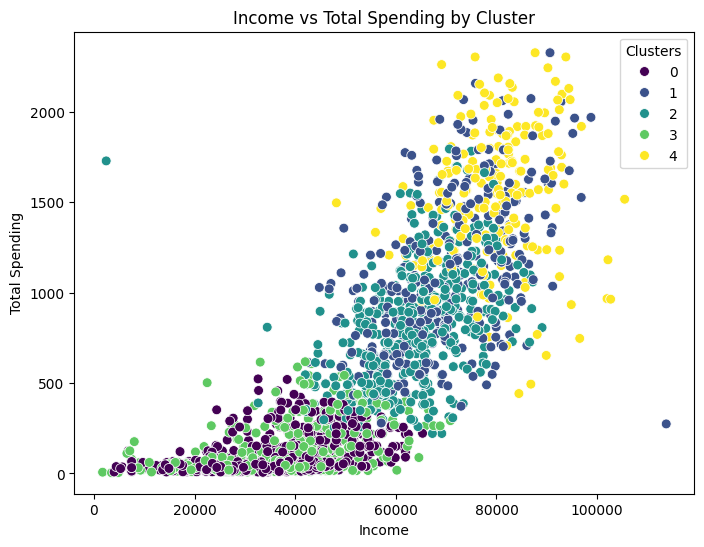

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='MntTotal', data=customer_df, hue='Cluster', palette='viridis', s=50)
plt.title('Income vs Total Spending by Cluster')
plt.xlabel('Income')
plt.ylabel('Total Spending')
plt.legend(title='Clusters')
plt.show()


Income by clusters

<ipython-input-34-9081e56b5fde>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Income', data=customer_df, palette='viridis')


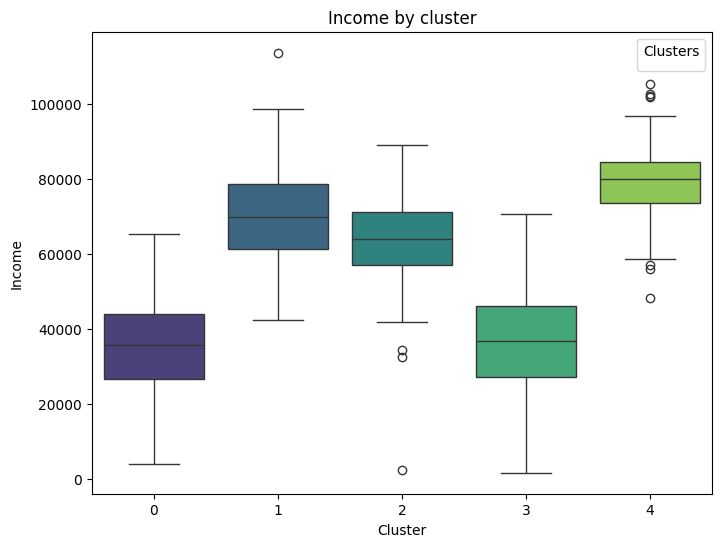

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='Income', data=customer_df, palette='viridis')
plt.title('Income by cluster')
plt.xlabel('Cluster')
plt.ylabel('Income')
plt.legend(title='Clusters')

In relationship feature by cluster

<ipython-input-35-d19c0e65267c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='In_relationship', data=customer_df, palette='viridis')


Text(0, 0.5, 'In_relationship')

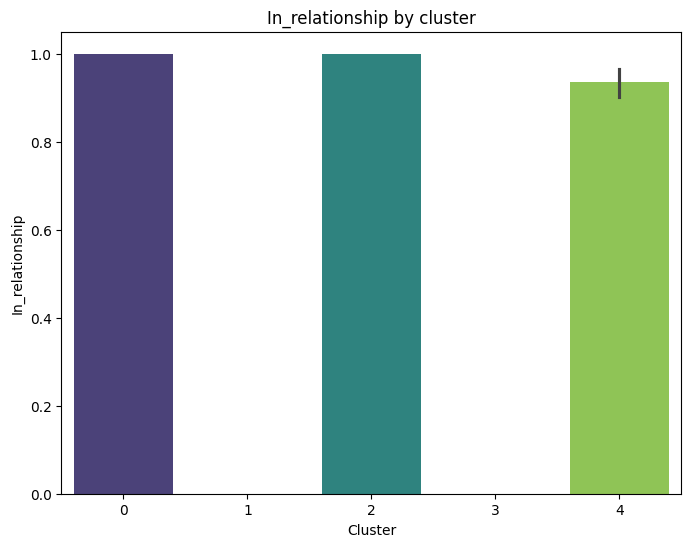

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Cluster', y='In_relationship', data=customer_df, palette='viridis')
plt.title('In_relationship by cluster')
plt.xlabel('Cluster')
plt.ylabel('In_relationship')

Mean values of sales channels used for purchases by clusters

In [ ]:
purchase_data = customer_df.groupby('Cluster')[cols_source_of_purchase].mean().reset_index()
purchase_data.head()

,Cluster,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,0,2.416918,0.649547,3.460725
1,1,5.759494,4.920886,8.357595
2,2,5.895455,3.850000,7.977273
3,3,2.733668,0.814070,3.603015
4,4,5.926829,6.546341,9.078049


    Cluster       Sales_channels  Purchases
0         0      NumWebPurchases   2.416918
1         1      NumWebPurchases   5.759494
2         2      NumWebPurchases   5.895455
3         3      NumWebPurchases   2.733668
4         4      NumWebPurchases   5.926829
5         0  NumCatalogPurchases   0.649547
6         1  NumCatalogPurchases   4.920886
7         2  NumCatalogPurchases   3.850000
8         3  NumCatalogPurchases   0.814070
9         4  NumCatalogPurchases   6.546341
10        0    NumStorePurchases   3.460725
11        1    NumStorePurchases   8.357595
12        2    NumStorePurchases   7.977273
13        3    NumStorePurchases   3.603015
14        4    NumStorePurchases   9.078049


<ipython-input-37-77b2f0a70fd8>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Cluster", y="Purchases", hue="Sales_channels", data=melted_data, ci=None, palette="viridis")


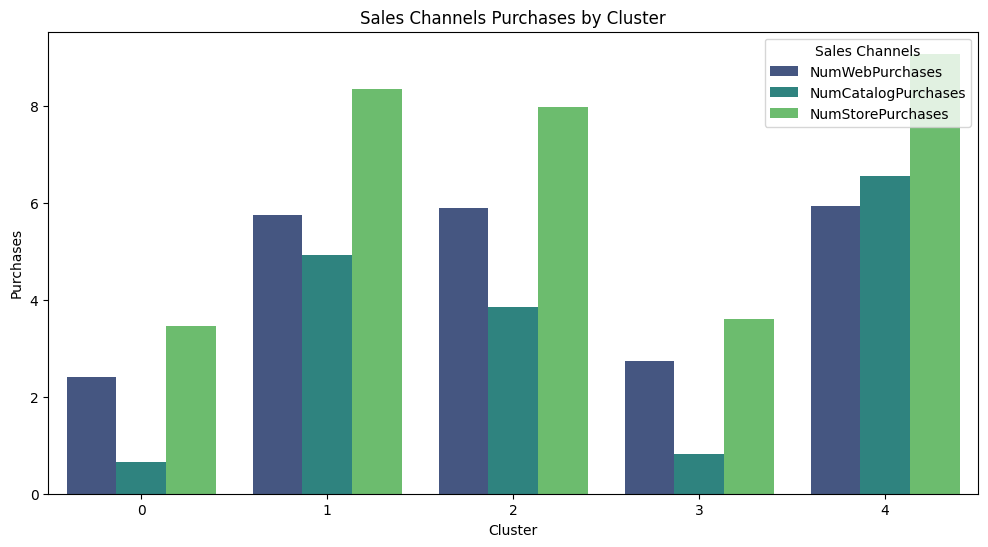

In [ ]:
melted_data = pd.melt(purchase_data, id_vars="Cluster", var_name="Sales_channels", value_name="Purchases")
print(melted_data)
plt.figure(figsize=(12, 6))
sns.barplot(x="Cluster", y="Purchases", hue="Sales_channels", data=melted_data, ci=None, palette="viridis")
plt.title("Sales Channels Purchases by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Purchases")
plt.xticks(rotation=0)
plt.legend(title="Sales Channels", loc="upper right")

plt.show()

Overall Accepted Campaign offers by clusters

In [ ]:
campaign_data = customer_df.groupby('Cluster')[cols_campaigns].mean().reset_index()
campaign_data.head()

,Cluster,AcceptedCmpOverall,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
0,0,0.077039,0.000000,0.001511,0.063444,0.012085,0.000000
1,1,0.465190,0.104430,0.022152,0.075949,0.142405,0.120253
2,2,0.188636,0.031818,0.004545,0.052273,0.093182,0.006818
3,3,0.087940,0.002513,0.000000,0.077889,0.007538,0.000000
4,4,1.439024,0.414634,0.078049,0.151220,0.282927,0.512195


<ipython-input-39-3c80b52dd68a>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Cluster", y="Average Acceptance", hue="Campaign Offers", data=melted_data, ci=None, palette="viridis")


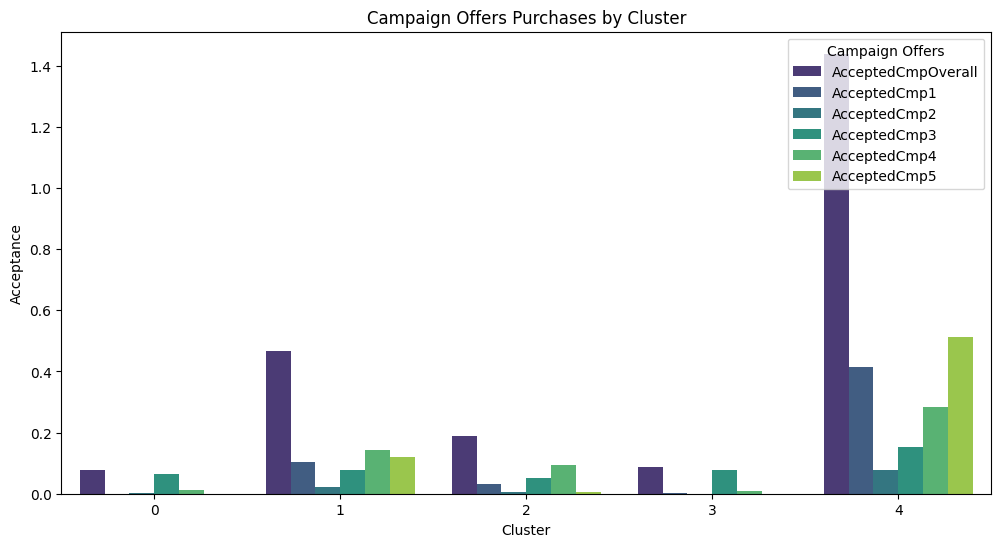

In [ ]:
melted_data = pd.melt(campaign_data, id_vars="Cluster", var_name="Campaign Offers", value_name="Average Acceptance")
plt.figure(figsize=(12, 6))
sns.barplot(x="Cluster", y="Average Acceptance", hue="Campaign Offers", data=melted_data, ci=None, palette="viridis")
plt.title("Campaign Offers Purchases by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Acceptance")
plt.xticks(rotation=0)
plt.legend(title="Campaign Offers", loc="upper right")

plt.show()

**Results**

The analysis focused on clustering customer data to identify meaningful segments for an e-commerce company.

Feature Selection: the following features were chosen Income, MntTotal, Number of Purchases, In_relationship and AcceptedCmpOverall.

These features capture customer spending, purchasing behavior, and engagement levels.

K-Means clustering was applied, revealing distinct customer segments based on behavioral patterns.

Optimal number of clusters(5) were determined using the Elbow and silhoutte score Method, ensuring a balance between cluster cohesion and separation.

Clusters were visualized using scatter plots and bar charts, highlighting the unique characteristics of each segment.

Cluster 0:



*   This cluster contains 33% of the customer base
*   They spent the least amount on all products with just 103.88$ spent with over 80% spent on Regular prods
*   They are also a low  income cluster with their average income being 35287.08
*   The customers in the cluster are in a relationship either together or married
*   They have the least number of average purchases with just 6.52 with store purchases having the maximum number of purchases from them with 3.46 and catalog having the least with 0.65
*   They barely accepted campaign offers with an average acceptance rate of just 7.7%







Cluster 1:



*   This cluster contains 16% of the customer base
*   They are the 2nd highest spending cluster with about 1096.94$ spent on all products, Regular products were their highest purchased product followed by wines then meat.

*   They are a high income customer base with about 69911.57$ mean income
*   The customers in the cluster are not in a relationship
*   They have a high average number of purchase with 19.03 with most of their purchases coming from store while web and catalog are not lagging behind also
*   They have a campaign acceptance rate of 46.5% with the 4th campaign being the most accepted in the cluster

Cluster 2:



*   This cluster contains 22% of the customer base
*   They are a high spending cluster with a mean of 812$ spent with regular products, wine and meat being the highest purchased in the cluster while fruits and sweets were the lowest purchased

*   They are a high income customer base with about 63967.04$ mean income
*   The customers in the cluster are in a relationship (Married or Together)
*   They have a high average number of purchase with 17.73 with most of their purchases coming from store and web.
*   They have a campaign acceptance rate of 18.9% with the 4th campaign being the most accepted in the cluster while campaign 2 and 5 had no acceptance

Cluster 3:



*   This cluster contains 20% of the customer base
*   They spent the 2nd lowest amount on all products with just 131.2$ spent regular prods, wine, meat and gold were the most purchased in this cluster

*   They are also a low income cluster with their average income being 36607.55$

*   The customers in the cluster are not in a relatinship
*   They have the a low number of average purchases with just 7.17 with store purchases having the maximum number of purchases from them with 3.6 and catalog having the least with 0.81
*   They barely accepted campaign offers with an average acceptance rate of just 8.8%

Cluster 4:



*   This cluster contains 10% of the customer base
*   They are the highest spending cluster with about 1532.18$ spent on all products, Regular products were their highest purchased product followed by wines then meat. Fruits and sweets were their lowest purchased purchased product

*   They are a high income customer base with about 79475.80$ mean income
*   Most of the customers in the cluster are in a relationship (93.65%)
*   They have a high average number of purchase with 21.55 with store having the highest followed by catalog then web
*   They have a campaign acceptance rate of 143.9% with the 5th and 1st Campaign being the most accepted while the 2nd campaign being the least accepted

**RECOMMENDATIONS**

**Cluster 0: Low-Value Customers in Relationships**


  **Discount Strategies**: Introduce store-wide discounts on regular products, as they make up the bulk of this segment’s purchases.

  **Affordable Options:** Promote lower-priced variants of fruits, sweets, and fish to encourage trial.

  **Engagement Programs**: Launch campaigns tailored for family-oriented products and advertise through in-store promotions since most purchases are made in-store.

  **Low-Commitment Loyalty Program:** Develop a simple rewards program to incentivize recurring purchases without significant financial commitments.



**Cluster 1: High-Spending Singles**

**Premium Promotions:** Offer curated bundles for wines, meat, and regular products, emphasizing quality to resonate with their spending habits.

**Engage Singles:** Use vibrant, lifestyle-driven campaigns focusing on independence and self-indulgence to appeal to their demographic.

**Boost Underperforming Products:** Introduce targeted discounts on fruits, sweets, and fish via online and catalog channels to diversify their purchasing habits.

**Exclusive Campaigns:** Leverage Campaign 4 insights to create similar offers, emphasizing limited-time promotions for premium products.

**Cluster 2: High-Spending Couples**

**Family-Oriented Offers:** Create promotions emphasizing value packs for wines and meats, paired with complementary items like fruits and sweets, targeting couples’ preferences.

**Revive Campaign 4:** Design campaigns similar to Campaign 4 but tailor them with family-friendly themes to boost acceptance rates.

**Product Awareness Campaigns:** Run web and store-based awareness programs highlighting the nutritional value and versatility of fruits and fish.

**Cross-Selling Opportunities:** Incentivize additional purchases of underperforming products like sweets by offering discounts when bundled with popular items.


**Cluster 3: Low-Value Singles**

**Discount-Driven Campaigns:** Implement aggressive discounting on basic products like regular items to encourage more frequent purchases.

**Simplified Offers:** Develop small, affordable bundles including fruits, sweets, and fish to test their appeal.

**Digital Engagement:** Use email or social media campaigns targeted at singles, focusing on convenience and affordability.

**Incentivized Participation:** Provide small rewards or entry-level loyalty benefits to increase campaign engagement rates.

**Cluster 4: High-Spending Couples**

**Luxury Campaigns:** Tailor premium campaigns featuring high-end wines, meats, and regular products, emphasizing exclusivity.

**Bundling Strategy:** Offer curated gourmet bundles that include underperforming items like fruits, sweets, and fish as complementary additions.

**Leverage Campaigns 1 and 5:** Expand on the themes of these campaigns, emphasizing exclusivity and personalization for high-value customers.

**Family-Centric Promotions:** Create targeted promotions for couples, especially highlighting catalog and store channels where their engagement is highest.